In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from collections import Counter
import numpy as np
import pandas as pd
import os

In [2]:
# creates absolute path
def abspath(path, *paths):
    fpath = os.path.join(os.getcwd(), os.pardir, path)

    for p in paths:
        fpath = os.path.join(fpath, p)
    return fpath

In [3]:
def dbscan(data, clusters, e=7.5, min_pts=3):
    c = 0   # Cluster label
    for i in range(data.shape[0]):

        # Skip if already assigned a cluster
        if not pd.isnull(clusters[i]):
            continue

        # Density check - label Noise if no. of neighbors less than min_pts
        if data[i][3] < min_pts:
            clusters[i] = 'Noise'
            continue

        # Next cluster label
        c = c + 1

        # Add point to the new cluster
        clusters[i] = c

        # Process every point in neighborhood except the point itself
        for j in data[i][4]:
            j = int(j)
            if j != i:

                # Change noise point to border point 
                if clusters[j] == 'Noise':
                    clusters[j] = c

                # Skip if already assigned a cluster
                if not pd.isnull([clusters[j]]):
                    continue

                # Add neighbor to the current cluster
                clusters[j] = c

                # Density check - add new neighbors to seed set if no. of neighbors greater than min_pts
                if data[j][3] >= min_pts:
                    for k in data[j][4]:
                        if int(k) != i:
                            data[i][3] += 1
                            data[i][4].append(k)
                            
    plot_results(clusters, data)

In [4]:
def plot_results(clusters, data):

    # Convert list of clusters to dict of clusters
    clusters_dict = {}
    for i in range(len(clusters)):
        clusters_dict.setdefault(clusters[i], []).append(i)
    
    # Plot results
    a_list = [] # Cluster 1
    b_list = [] # Cluster 2
    c_list = [] # Cluster 3
    d_list = [] # Cluster Noise
    
    for key,value in clusters_dict.items():
        for v in value:
            if key == 1:
                a_list.append(data[:, [1,2]][v])
            if key == 2:
                b_list.append(data[:, [1,2]][v])
            if key == 3:
                c_list.append(data[:, [1,2]][v])
            if key == 'Noise':
                d_list.append(data[:, [1,2]][v])

    x1, y1 = zip(*a_list) # unpack a list of pairs into two tuples
    x2, y2 = zip(*b_list)
    x3, y3 = zip(*c_list)
    x4, y4 = zip(*d_list)
    
    plt.plot(x1, y1, 'ro')
    plt.plot(x2, y2, 'bo')
    plt.plot(x3, y3, 'go')
    plt.plot(x4, y4, 'yo')
    plt.show()

(80, 6)


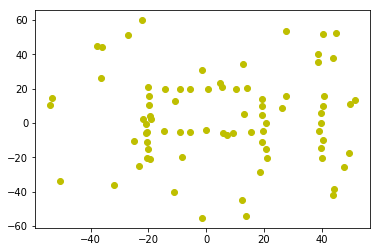

In [5]:
dataset_path = abspath('datasets', 'dbscan.csv')
dbscan_dataset = pd.read_csv(dataset_path, sep=',', header=0)
dbscan_dataset = dbscan_dataset.values

# Change type of list of neighbors from string to list of strings
for db in dbscan_dataset:
    db[5] = db[5].split(',')

print(dbscan_dataset.shape)

clusters = dbscan_dataset[:, 0]
data = dbscan_dataset[:, range(1, dbscan_dataset.shape[1])]

x1, y1 = zip(*data[:, [1,2]]) # unpack a list of pairs into two tuples
plt.plot(x1, y1, 'yo')
plt.show()

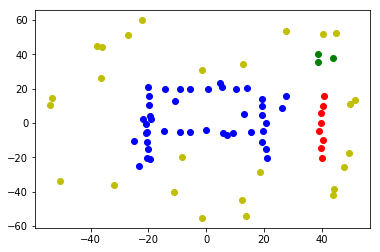

In [6]:
dbscan(data, clusters)